In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.optimize
from pathlib import Path

In [13]:
lines = [l.strip().split() for l in Path('data/subdataset-size-function.csv').read_text().split('\n') if l]
x = np.array([int(l[0].strip()) for l in lines])
y = np.array([float(l[1].strip()) for l in lines])

y = y / y[-1]
x = x / x[-1]

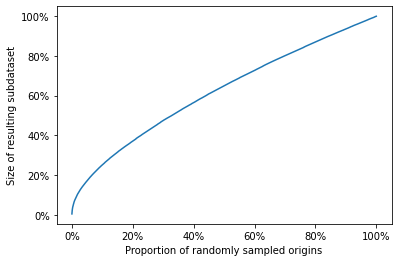

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("Proportion of randomly sampled origins")
ax.set_ylabel("Size of resulting subdataset")
ax.plot(x, y)
plt.savefig("../img/graph-exploitation/subdataset_size_function.pdf")

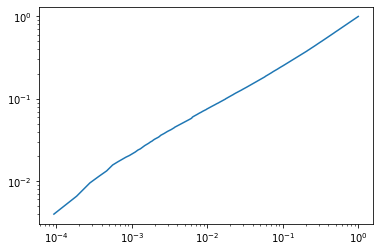

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y)

In [6]:
# data_df = pd.DataFrame({'x': x, 'y': y})


def fitted_func(params):
    return params[0] * np.log(np.exp(params[2]) * x ** np.exp(params[1]) + 1)


def obj_weird_func(params):
    residuals = y - fitted_func(params)
    return np.sum(np.square(residuals))


%time coeffs = scipy.optimize.minimize(obj_weird_func, [1, 1, 1])

CPU times: user 1.37 s, sys: 0 ns, total: 1.37 s
Wall time: 1.37 s


In [7]:
coeffs.x

array([435.78757202,  -0.4930361 ,  -6.08018287])

In [8]:
def simplified_func():
    return 435 * np.log(0.00228 * x ** 0.610 + 1)

y_hat = fitted_func(coeffs.x)
y_hat_simplified = simplified_func()

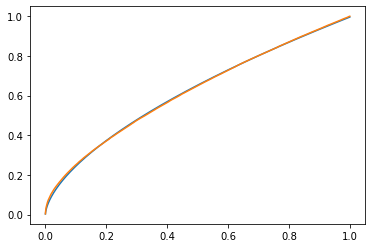

In [9]:


plt.plot(x, y_hat)
#plt.plot(x, y_hat_simplified)
plt.plot(x, y)

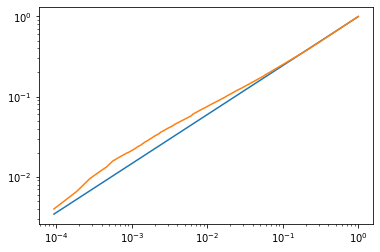

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y_hat)
ax.plot(x, y)